##### Dataset

In [2]:
# headlines.csv
# https://mitu.co.in/dataset

##### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag

##### Read the dataset

In [8]:
df = pd.read_csv('headlines.csv', header=None)

In [9]:
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [12]:
print(df[0][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

##### Data Preparation

In [85]:
swords = stopwords.words('english')
swords.append('said')

In [21]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    return tokens3

In [22]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [23]:
clean_text(sent)

['hello', 'friends', 'like', 'python', 'programming']

In [37]:
def lemmatize(word):
    tag = pos_tag([word])
    pos ='n'
    wnl = WordNetLemmatizer()
    if tag[0][1].startswith('N'):
        pos = 'n'
    if tag[0][1].startswith('V'):
        pos = 'v'
    if tag[0][1].startswith('J'):
        pos = 'a'
    if tag[0][1].startswith('R'):
        pos = 'r'
    return(wnl.lemmatize(word, pos=pos))

In [39]:
lemmatize('better')

'well'

In [92]:
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
swords.append('said')
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

In [87]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [43]:
# Create the cleaned data and plot the wordcloud

In [65]:
cleaned = df[0].apply(clean_text)

In [66]:
cleaned

0       [budget, set, scene, election, gordon, brown, ...
1       [army, chief, regiment, decision, military, ch...
2       [howard, denies, split, id, card, michael, how...
3       [observer, monitor, uk, election, minister, in...
4       [kilroy, name, election, seat, target, show, h...
                              ...                        
2220    [india, open, sky, competition, india, allow, ...
2221    [yukos, bankruptcy, u, matter, russian, author...
2222    [survey, confirms, property, slowdown, governm...
2223    [high, fuel, price, hit, ba, profit, british, ...
2224    [u, trade, gap, hit, record, gap, u, export, i...
Name: 0, Length: 2225, dtype: object

In [69]:
final_text = ' '.join(cleaned.values[0])

In [70]:
final_text

'budget set scene election gordon brown seek put economy centre labour bid third term power delivers ninth budget gmt expect stress importance continued economic stability low unemployment interest rate chancellor expect freeze petrol duty raise stamp duty threshold conservative lib dems insist voter face high tax labour treasury official say giveaway mr brown thought spare increase stamp duty threshold freeze petrol duty extension tax credit scheme poorer family possible help pensioner stamp duty threshold rise intend help first time buyer likely theme three main party general election manifesto ten year ago buyer much great chance avoid stamp duty close half million property england wale alone sell less since average uk property price double start threshold stamp duty increase tax credit result number property incur stamp duty rocket government tax take liberal democrat unveiled proposal raise stamp duty threshold february tory also thought likely propose increase threshold shadow ch

In [56]:
wcloud = WordCloud().generate(' '.join(cleaned))

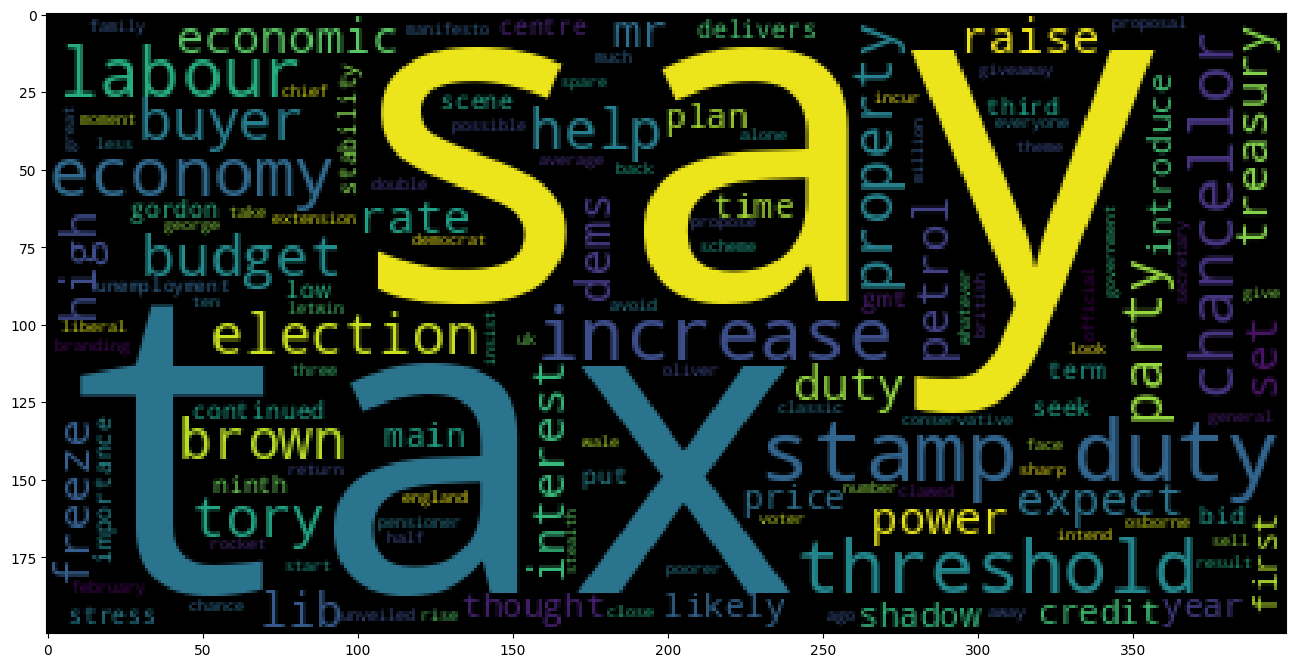

In [58]:
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

##### TF*IDF Vectorizer

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [90]:
x_new = tfidf.fit_transform(df[0])

In [91]:
x_new.shape

(2225, 21406)

##### K-Means Cluster Object

In [93]:
from sklearn.cluster import KMeans

In [94]:
km = KMeans(random_state=0)

In [95]:
labels = km.fit_predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [96]:
labels

array([0, 1, 0, ..., 7, 1, 7], dtype=int32)

In [97]:
km.inertia_

2069.454846068392

##### Elbow Method

In [98]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)

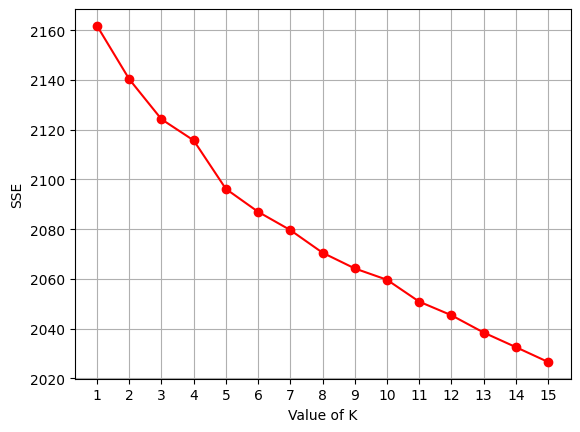

In [99]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker = 'o', color = 'r')

##### Create the clusters

In [103]:
km = KMeans(random_state=0, n_clusters=5, n_init='auto')

In [104]:
labels = km.fit_predict(x_new)

In [105]:
labels

array([4, 3, 4, ..., 3, 3, 3], dtype=int32)

##### Separate the clusters

In [109]:
zero = df[labels == 0]
one = df[labels == 1]
two = df[labels == 2]
three = df[labels == 3]
four = df[labels == 4]

In [110]:
print('Cluster-0:', len(zero))
print('Cluster-1:', len(one))
print('Cluster-2:', len(two))
print('Cluster-3:', len(three))
print('Cluster-4:', len(four))

Cluster-0: 377
Cluster-1: 348
Cluster-2: 520
Cluster-3: 696
Cluster-4: 284


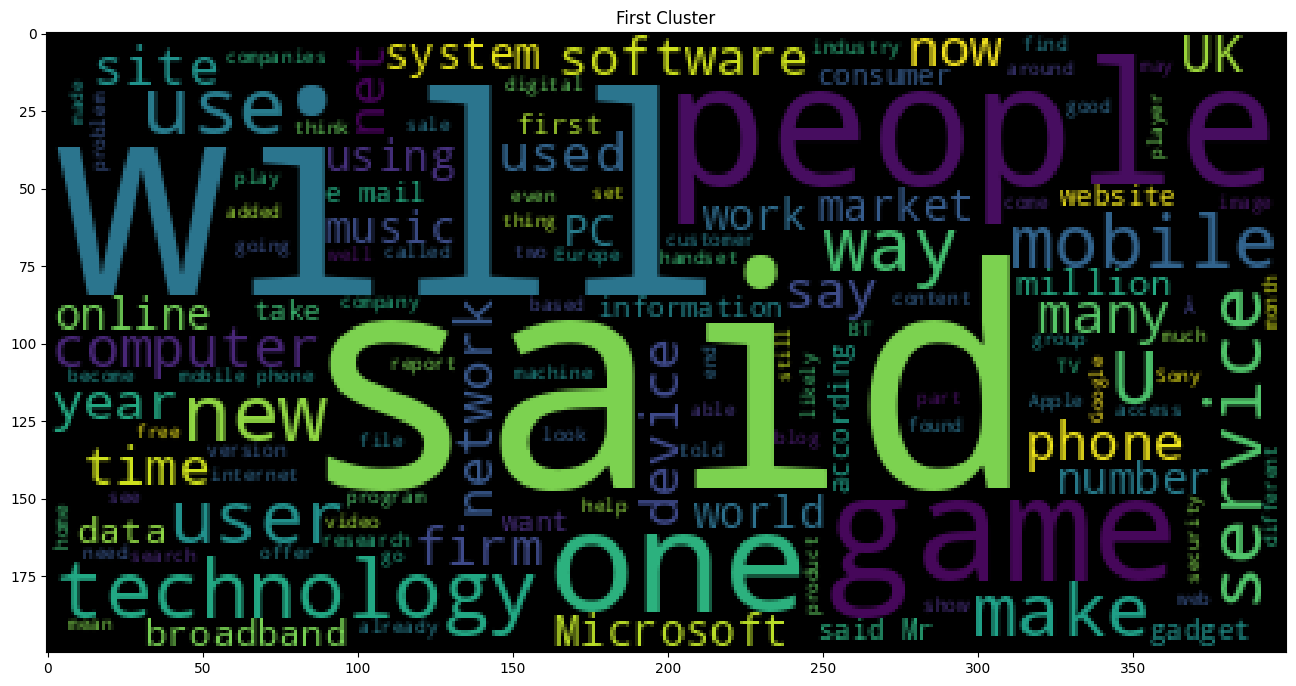

In [113]:
wc = WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [122]:
from nltk import FreqDist
new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Label= Entertainment

[('film', 671),
 ('best', 567),
 ('also', 344),
 ('year', 328),
 ('music', 312),
 ('show', 296),
 ('US', 275),
 ('one', 257),
 ('first', 230),
 ('UK', 220)]

In [124]:
from nltk import FreqDist
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Label= Technology

[('people', 888),
 ('also', 492),
 ('Mr', 476),
 ('technology', 469),
 ('new', 444),
 ('would', 444),
 ('could', 432),
 ('mobile', 423),
 ('music', 404),
 ('one', 377)]

In [126]:
from nltk import FreqDist
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Label= Sport

[('game', 519),
 ('England', 466),
 ('first', 442),
 ('would', 424),
 ('win', 412),
 ('last', 369),
 ('one', 347),
 ('two', 345),
 ('also', 343),
 ('time', 340)]

In [128]:
from nltk import FreqDist
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Label= Finance

[('US', 912),
 ('Mr', 847),
 ('would', 763),
 ('year', 757),
 ('also', 592),
 ('government', 527),
 ('could', 457),
 ('new', 451),
 ('company', 448),
 ('market', 428)]

In [ ]:
from nltk import FreqDist
new = ' '.join(four[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)
# Label= Politics